## Définitions


Communes associées ou déléguées : En application de la loi n° 71-588 du 16 juillet 1971 sur les regroupements de communes et de la loi n° 2010-1563 du 16 décembre 2010 de réforme des collectivités territoriales, un certain nombre de communes résultant de fusions comportent une ou plusieurs "communes associées ou déléguées". La population d’une fraction de commune est la population municipale calculée pour cette fraction de commune.

### Ensemble de communes : 
Conformément au décret n°2003-485 du 5 juin 2003, la population totale d’un ensemble de communes est la somme des populations totales des communes qui le constituent. La population municipale d’un ensemble de communes est la somme des populations municipales des communes qui le constituent.

Fractions cantonales : 
Un certain nombre de communes, en général les plus peuplées sont découpées en fractions cantonales. La population d’une fraction de commune est la population municipale calculée pour cette fraction de commune.

### Limites territoriales : 
Les populations indiquées dans les feuilles précédentes correspondent aux communes, cantons, arrondissements existant au 1ᵉʳ janvier 2019 dans les limites en vigueur à cette date.
L'INSEE attribue à chaque région, département, arrondissement, canton et commune, un code respectivement sur 2, 3, 1, 2, 3 positions. Un arrondissement, un canton ou une commune est parfaitement identifié par la concaténation du code du département dans lequel il se situe et de son propre code.

Une fraction cantonale est identifiée par le code du canton auquel elle appartient et le code de la commune.

Le rappel de ces différents codes dans tous les tableaux permet de connaître la composition cantonale et communale des arrondissements ainsi que la composition communale des cantons.

Ces codes sont publiés dans le Code officiel géographique dont la dernière édition, à jour au 1ᵉʳ janvier 2019, est disponible sur le site insee.fr. L’historique des communes depuis 1943, qui permet de connaître les modifications des limites territoriales, est également disponible sur le site.


### Nombre de communes : 
Lorsque, dans un département, le territoire d’une commune est réparti entre plusieurs cantons, celle-ci compte pour une unité dans le nombre de communes de chacun de ces cantons, mais ne compte que pour une unité dans le nombre de communes de l’arrondissement et du département. Cela explique que le nombre de communes d’un arrondissement (ou du département) ne soit pas toujours le total des nombres de communes des cantons le constituant.

### Population comptée à part : 
La population comptée à part comprend certaines personnes dont la résidence habituelle est dans une autre commune mais qui ont conservé une résidence sur le territoire de la commune :
les personnes mineures dont la résidence familiale est dans une autre commune mais qui résident, du fait de leurs études, dans la commune ;
les personnes ayant une résidence familiale sur le territoire de la commune et résidant dans une communauté d’une autre commune ; la communauté faisant partie de la liste suivante :
services de moyen ou de long séjour des établissements publics ou privés de santé, établissements sociaux de moyen ou de long séjour,maisons de retraite, foyers et résidences sociales ;
commaunautés religieuses ;
casernes ou établissements militaires ;
les personnes majeures âgées de moins de 25 ans ayant leur résidence familiale sur le territoire de la commune et qui résident dans une autre commune pour leurs études ;
les personnes sans domicile fixe rattachées à la commune au sens de la loi du 3 janvier 1969 et non recensées dans la commune.

### Population municipale : 
La population municipale comprend les personnes ayant leur résidence habituelle sur le territoire de la commune, dans un logement ou une communauté, les personnes détenues dans les établissements pénitentiaires de la commune, les personnes sans abri recensées sur le territoire de la commune et les personnes résidant habituellement dans une habitation mobile recensées sur le territoire de la commune.

### Population totale : 
La population totale est la somme de la population municipale et de la population comptée à part.

##### Reading the CSV file and displaying the dataframe description

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# No need for that
# %matplotlib inline
df_communes = pd.read_csv("Communes.csv",";")
df_communes.head()

,DEPCOM,COM,PMUN,PCAP,PTOT
0,01001,L' Abergement-Clémenciat,776,18,794
1,01002,L' Abergement-de-Varey,248,1,249
2,01004,Ambérieu-en-Bugey,14035,393,14428
3,01005,Ambérieux-en-Dombes,1689,34,1723
4,01006,Ambléon,111,6,117


In [2]:
df_communes.columns

Index(['DEPCOM', 'COM', 'PMUN', 'PCAP', 'PTOT'], dtype='object')

In [3]:
df_communes.index

RangeIndex(start=0, stop=34995, step=1)

In [4]:
df_communes.describe()

,PMUN,PCAP,PTOT
count,34995.000000,34995.000000,34995.000000
mean,1900.966967,35.340849,1936.307815
std,8583.400244,133.285462,8696.358429
min,0.000000,0.000000,0.000000
25%,199.000000,4.000000,203.000000
50%,457.000000,9.000000,468.000000
75%,1159.000000,24.000000,1184.000000
max,479553.000000,5256.000000,484809.000000


In [5]:
df_communes[df_communes["COM"].str.contains("Marcq-en-B")]
# Wow not an easy one.. but it works! Alternative way below to understand
# boolean indexing (you will often do something similar to that)

,DEPCOM,COM,PMUN,PCAP,PTOT
22189,59378,Marcq-en-Barœul,38617,807,39424


In [6]:
# Alternative version:
# Create a boolean vector...
boolean_vector = df_communes.COM.apply(lambda x: 'Marcq-en-B' in x)
boolean_vector.tail()

34990    False
34991    False
34992    False
34993    False
34994    False
Name: COM, dtype: bool

In [7]:
# ... to index your df
df_communes[boolean_vector]

,DEPCOM,COM,PMUN,PCAP,PTOT
22189,59378,Marcq-en-Barœul,38617,807,39424


##### Sort the dataframe to have it sorted by city's population ("PMUN")

In [121]:
df_communes.sort_values(by=["PMUN"],ignore_index = True, inplace=True)
df_communes

,DEPCOM,COM,PMUN,PCAP,PTOT
0,55039,Beaumont-en-Verdunois,0,0,0
1,55050,Bezonvaux,0,0,0
2,55307,Louvemont-Côte-du-Poivre,0,0,0
3,55239,Haumont-près-Samogneux,0,0,0
4,55189,Fleury-devant-Douaumont,0,0,0
...,...,...,...,...,...
34990,67482,Strasbourg,280966,2779,283745
34991,34172,Montpellier,285121,3479,288600
34992,44109,Nantes,309346,5157,314503
34993,06088,Nice,340017,2962,342979


##### Adding a "pourcent" column to compute the percentage of the population ("PMUN") living in the city ("COM")

In [122]:
pop_totale = df_communes["PMUN"].sum()
df_communes["pourcent"] = df_communes["PMUN"]/pop_totale*100
df_communes

,DEPCOM,COM,PMUN,PCAP,PTOT,pourcent
0,55039,Beaumont-en-Verdunois,0,0,0,0.000000
1,55050,Bezonvaux,0,0,0,0.000000
2,55307,Louvemont-Côte-du-Poivre,0,0,0,0.000000
3,55239,Haumont-près-Samogneux,0,0,0,0.000000
4,55189,Fleury-devant-Douaumont,0,0,0,0.000000
...,...,...,...,...,...,...
34990,67482,Strasbourg,280966,2779,283745,0.422351
34991,34172,Montpellier,285121,3479,288600,0.428597
34992,44109,Nantes,309346,5157,314503,0.465012
34993,06088,Nice,340017,2962,342979,0.511117


In [86]:
pop_totale

66524339

In [111]:
# Do we need to use PMUN or PTOT for total population?
pop_totale2 = df_communes['PTOT'].sum()
pop_totale2

67761092

## Alternative way to summarize cities

In [98]:
def summarize_df_big_city(df_communes, city_name, depcom):
    """Function that summarizes a df for a city with boroughs. Returns a series summarizing the big city"""
    boolean_vector = df_communes.COM.apply(lambda x: (city_name + ' ') in x)
    df_city = df_communes[boolean_vector].copy()
    # Summarizes the city
    s_summary = df_city.sum()
    # Set dep and name
    s_summary.DEPCOM = depcom
    s_summary.COM = city_name
    return s_summary

## Passing a list in argument to loop inside the method

In [99]:
def summarize_df_big_city_list(df_communes, city_names, depcoms):
    """Function that summarizes a df for a city with boroughs. Returns a series summarizing the big city"""
    df = pd.DataFrame()
    for city_name,depcom in zip(city_names,depcoms):
        boolean_vector = df_communes.COM.apply(lambda x: (city_name + ' ') in x)
        df_city = df_communes[boolean_vector].copy()
        # Summarizes the city
        s_summary = df_city.sum()
        # Set dep and name
        s_summary.DEPCOM = depcom
        s_summary.COM = city_name
        df = df.append(s_summary, ignore_index = True)
    df_communes = df_communes.append(df, ignore_index=True)
    df_communes.sort_values(by = "PMUN", ignore_index = True, inplace = True)
    return df_communes

In [123]:
summarize_df_big_city_list(df_communes=df_communes, city_names=['Marseille', 'Lyon', 'Paris'], depcoms=[13200, 69000, 75000])


,DEPCOM,COM,PMUN,PCAP,PTOT,pourcent
0,55039,Beaumont-en-Verdunois,0.0,0.0,0.0,0.000000
1,55050,Bezonvaux,0.0,0.0,0.0,0.000000
2,55307,Louvemont-Côte-du-Poivre,0.0,0.0,0.0,0.000000
3,55239,Haumont-près-Samogneux,0.0,0.0,0.0,0.000000
4,55189,Fleury-devant-Douaumont,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...
34993,06088,Nice,340017.0,2962.0,342979.0,0.511117
34994,31555,Toulouse,479553.0,5256.0,484809.0,0.720868
34995,69000,Lyon,516092.0,6587.0,522679.0,0.775794
34996,13200,Marseille,863310.0,6505.0,869815.0,1.297736


In [107]:
# Cities to be summarized with associated depcom
cities_to_sum = {'Marseille': 13200, 'Lyon': 69380, 'Paris': 75000}

In [92]:
# Loop through cities to be summarized and append to the end of df_communes
for city in cities_to_sum:
    s_summary = summarize_df_big_city(df_communes=df_communes, city_name=city, depcom=cities_to_sum[city])
    df_communes = df_communes.append(s_summary, ignore_index=True)
df_communes.tail(8)

,DEPCOM,COM,PMUN,PCAP,PTOT,pourcent
34993,06088,Nice,340017,2962,342979,0.511117
34994,31555,Toulouse,479553,5256,484809,0.720868
34995,13200,Marseille,863310,6505,869815,1.297736
34996,69380,Lyon,516092,6587,522679,0.775794
34997,75000,Paris,2187526,17247,2204773,3.288309
34998,13200,Marseille,863310,6505,869815,1.297736
34999,69380,Lyon,516092,6587,522679,0.775794
35000,75000,Paris,2187526,17247,2204773,3.288309


... And now let's remove the individual lines per borough

In [124]:
def agg_city_borough_row(com):
    """Function that returns True if com is a borough of one of the big aggregated cities"""
    # Returns true if com is in the dictionary of cities to sum AND the word 'Arrondissement' is in it too
    bool_cond = (com[:com.find(' ')] in cities_to_sum) and ('Arrondissement' in com)
    return bool_cond

In [127]:
# Create a boolean vector to identify the rows that corresponds to boroughs (rows that will be later removec)
bool_vect_rows_to_rm = df_communes.COM.apply(agg_city_borough_row)
# Use boolean vector to index df
df_communes[bool_vect_rows_to_rm].sort_values(by = "COM")

,DEPCOM,COM,PMUN,PCAP,PTOT,pourcent
34680,69381,Lyon 1er Arrondissement,29352,790,30142,0.044122
34694,69382,Lyon 2e Arrondissement,30520,378,30898,0.045878
34945,69383,Lyon 3e Arrondissement,101744,1008,102752,0.152943
34752,69384,Lyon 4e Arrondissement,35949,420,36369,0.054039
34838,69385,Lyon 5e Arrondissement,49409,1064,50473,0.074272
34852,69386,Lyon 6e Arrondissement,51777,791,52568,0.077832
34926,69387,Lyon 7e Arrondissement,81566,539,82105,0.122611
34929,69388,Lyon 8e Arrondissement,85088,1022,86110,0.127905
34844,69389,Lyon 9e Arrondissement,50687,575,51262,0.076193
34873,13210,Marseille 10e Arrondissement,56138,374,56512,0.084387


In [114]:
# List of indexes to be removed
bool_vect_rows_to_rm[bool_vect_rows_to_rm == True].index

Int64Index([34370, 34373, 34514, 34598, 34653, 34680, 34694, 34734, 34741,
            34752, 34757, 34777, 34788, 34799, 34823, 34835, 34836, 34838,
            34844, 34851, 34852, 34873, 34877, 34882, 34884, 34886, 34893,
            34916, 34917, 34925, 34926, 34929, 34937, 34940, 34945, 34963,
            34965, 34969, 34976, 34977, 34981, 34983, 34984, 34985, 34988],
           dtype='int64')

In [117]:
# Drop those indexes from the df...
df_communes.drop(index=bool_vect_rows_to_rm[bool_vect_rows_to_rm == True].index, inplace=True)

KeyError: '[34370 34373 34514 34598 34653 34680 34694 34734 34741 34752 34757 34777\n 34788 34799 34823 34835 34836 34838 34844 34851 34852 34873 34877 34882\n 34884 34886 34893 34916 34917 34925 34926 34929 34937 34940 34945 34963\n 34965 34969 34976 34977 34981 34983 34984 34985 34988] not found in axis'

In [118]:
# And checking as well that the aggreagated cities are still at the end of the df (they are)
df_communes.tail(8)

,DEPCOM,COM,PMUN,PCAP,PTOT,pourcent
34986,35238,Rennes,216815,4110,220925,0.325918
34987,59350,Lille,232787,2055,234842,0.349928
34989,33063,Bordeaux,254436,3368,257804,0.382471
34990,67482,Strasbourg,280966,2779,283745,0.422351
34991,34172,Montpellier,285121,3479,288600,0.428597
34992,44109,Nantes,309346,5157,314503,0.465012
34993,06088,Nice,340017,2962,342979,0.511117
34994,31555,Toulouse,479553,5256,484809,0.720868


# --> CAN BE REMOVED (START) 

## Croix Daurade inital way to summarize cities

In [119]:
df_marseille = df_communes[df_communes["COM"].str.contains("Marseille ")]
df_marseille

,DEPCOM,COM,PMUN,PCAP,PTOT,pourcent


In [42]:
df_marseille_nl = df_marseille.groupby(by = df_communes["COM"].str.contains("Marseille ")).sum()
df_marseille_nl

,PMUN,PCAP,PTOT,pourcent
COM,,,,
True,863310,6505,869815,1.297736


In [43]:
df_paris = df_communes[df_communes["COM"].str.contains("Paris ")]
df_paris

,DEPCOM,COM,PMUN,PCAP,PTOT,pourcent
34373,75101,Paris 1er Arrondissement,16266,129,16395,0.024451
34514,75102,Paris 2e Arrondissement,20900,142,21042,0.031417
34653,75104,Paris 4e Arrondissement,28088,282,28370,0.042222
34734,75103,Paris 3e Arrondissement,34115,274,34389,0.051282
34757,75108,Paris 8e Arrondissement,36808,560,37368,0.055330
34788,75106,Paris 6e Arrondissement,41100,876,41976,0.061782
34851,75107,Paris 7e Arrondissement,51367,826,52193,0.077215
34882,75105,Paris 5e Arrondissement,58850,781,59631,0.088464
34884,75109,Paris 9e Arrondissement,59555,516,60071,0.089524
34937,75110,Paris 10e Arrondissement,90372,464,90836,0.135848


In [44]:
df_paris_nl = df_paris.groupby(by = df_communes["COM"].str.contains("Paris ")).sum()
df_paris_nl

,PMUN,PCAP,PTOT,pourcent
COM,,,,
True,2187526,17247,2204773,3.288309


In [45]:
df_lyon = df_communes[df_communes["COM"].str.contains("Lyon ")]
df_lyon

,DEPCOM,COM,PMUN,PCAP,PTOT,pourcent
34680,69381,Lyon 1er Arrondissement,29352,790,30142,0.044122
34694,69382,Lyon 2e Arrondissement,30520,378,30898,0.045878
34752,69384,Lyon 4e Arrondissement,35949,420,36369,0.054039
34838,69385,Lyon 5e Arrondissement,49409,1064,50473,0.074272
34844,69389,Lyon 9e Arrondissement,50687,575,51262,0.076193
34852,69386,Lyon 6e Arrondissement,51777,791,52568,0.077832
34926,69387,Lyon 7e Arrondissement,81566,539,82105,0.122611
34929,69388,Lyon 8e Arrondissement,85088,1022,86110,0.127905
34945,69383,Lyon 3e Arrondissement,101744,1008,102752,0.152943


In [46]:
df_lyon_nl = df_lyon.groupby(by = df_communes["COM"].str.contains("Lyon ")).sum()
df_lyon_nl

,PMUN,PCAP,PTOT,pourcent
COM,,,,
True,516092,6587,522679,0.775794


##### Add a line for each Marseille, Lyon and Paris with their total population, at the end of the dataframe, to have the dataframe still rightly sorted

In [47]:
df_communes.loc[df_communes.index.max()+1] = [69380, "Lyon", df_lyon_nl["PMUN"][1], df_lyon_nl["PCAP"][1], df_lyon_nl["PTOT"][1], df_lyon_nl["pourcent"][1]]
df_communes.loc[df_communes.index.max()+1] = [13200, "Marseille", df_marseille_nl["PMUN"][1], df_marseille_nl["PCAP"][1], df_marseille_nl["PTOT"][1], df_marseille_nl["pourcent"][1]]
df_communes.loc[df_communes.index.max()+1] = [75000, "Paris", df_paris_nl["PMUN"][1], df_paris_nl["PCAP"][1], df_paris_nl["PTOT"][1], df_paris_nl["pourcent"][1]]
df_communes

,DEPCOM,COM,PMUN,PCAP,PTOT,pourcent
0,55039,Beaumont-en-Verdunois,0,0,0,0.000000
1,55050,Bezonvaux,0,0,0,0.000000
2,55307,Louvemont-Côte-du-Poivre,0,0,0,0.000000
3,55239,Haumont-près-Samogneux,0,0,0,0.000000
4,55189,Fleury-devant-Douaumont,0,0,0,0.000000
...,...,...,...,...,...,...
34993,06088,Nice,340017,2962,342979,0.511117
34994,31555,Toulouse,479553,5256,484809,0.720868
34995,69380,Lyon,516092,6587,522679,0.775794
34996,13200,Marseille,863310,6505,869815,1.297736


##### Remove the lines linked to big cities arrondissements

In [48]:
IndexNames_Paris = df_communes[df_communes["COM"].str.contains("Paris ")].index
IndexNames_Lyon = df_communes[df_communes["COM"].str.contains("Lyon ")].index
IndexNames_Marseille = df_communes[df_communes["COM"].str.contains("Marseille ")].index

df_communes.drop(IndexNames_Paris, inplace = True)
df_communes.drop(IndexNames_Lyon, inplace = True)
df_communes.drop(IndexNames_Marseille, inplace = True)

df_communes

,DEPCOM,COM,PMUN,PCAP,PTOT,pourcent
0,55039,Beaumont-en-Verdunois,0,0,0,0.000000
1,55050,Bezonvaux,0,0,0,0.000000
2,55307,Louvemont-Côte-du-Poivre,0,0,0,0.000000
3,55239,Haumont-près-Samogneux,0,0,0,0.000000
4,55189,Fleury-devant-Douaumont,0,0,0,0.000000
...,...,...,...,...,...,...
34993,06088,Nice,340017,2962,342979,0.511117
34994,31555,Toulouse,479553,5256,484809,0.720868
34995,69380,Lyon,516092,6587,522679,0.775794
34996,13200,Marseille,863310,6505,869815,1.297736


# <-- CAN BE REMOVED (END) 

##### Interesting "no people living here" cities

In [49]:
df_communes[df_communes["PMUN"] == 0]

,DEPCOM,COM,PMUN,PCAP,PTOT,pourcent
0,55039,Beaumont-en-Verdunois,0,0,0,0.0
1,55050,Bezonvaux,0,0,0,0.0
2,55307,Louvemont-Côte-du-Poivre,0,0,0,0.0
3,55239,Haumont-près-Samogneux,0,0,0,0.0
4,55189,Fleury-devant-Douaumont,0,0,0,0.0
5,55139,Cumières-le-Mort-Homme,0,0,0,0.0


##### Plot the population as a function of index
We see that a lot of cities have very few inhabitants

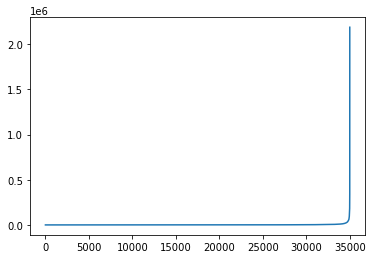

In [50]:
#plt.plot(df_communes["PMUN"])
plt.plot(df_communes["PMUN"])


##### Plot with bars, zooming to better see the figures 

(30000.0, 36000.0)

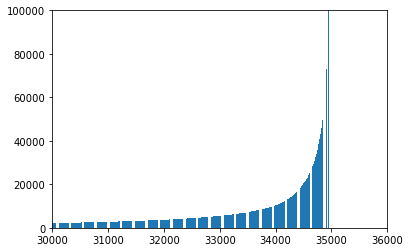

In [51]:
plt.bar(df_communes.index, df_communes["PMUN"])
plt.gca().set_ylim(0,100000)
plt.gca().set_xlim(30000,36000)

##### Create the abscissas to plot tje percentage of population living in cities "from x to 10 * x inhabitants" 

In [52]:
pop_pourcent = []
for i in range(7):
    pop_pourcent.append(df_communes[(df_communes["PMUN"] < 10**(i+1)) & (df_communes["PMUN"] >= 10**(i))]["pourcent"].sum())
pop_pourcent = np.array(pop_pourcent)
abscisses = np.array(["Entre {0} et {1}".format(10**i,10**(i+1)) for i in range(7)])

pop_pourcent.sum()

100.0

##### Plotting the bars

Text(0.5, 1.0, 'Percentage of the population in cities of different sizes ')

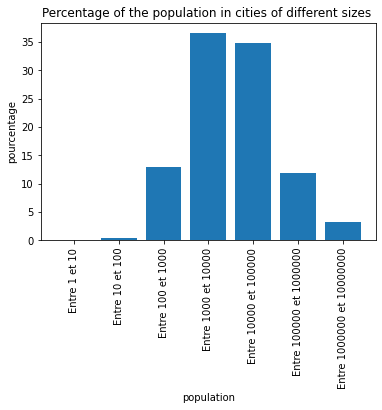

In [53]:
plt.bar(abscisses, pop_pourcent)
plt.gca().set_xlabel('population')
plt.gca().set_ylabel('pourcentage')
plt.xticks(rotation = 'vertical')
plt.title("Percentage of the population in cities of different sizes ")